# Marketing And Retail Analytics : Capstone Project

OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing.

 In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

Aim - To help OList to identify the product categories which they can get rid of without significantly impacting business.

#### Read and Understand the Data

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Orders
<hr/>

In [2]:
#Reading Orders Table
orders = pd.read_excel("Retail_dataset.xlsx",sheet_name = 'orders')

In [3]:
#Checking the data
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [4]:
#Checking the shape of orders
orders.shape

(99441, 7)

##### There are 99441 rows and 7 columns

In [5]:
#Checking the information on orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


In [6]:
#Checking the duplicate in order_id
orders.order_id.duplicated().sum()

0

In [7]:
#Checking the duplicate in customer_id
orders.customer_id.duplicated().sum()

3345

##### As expected as multiple orders can be made by a single customers.

In [8]:
#Checking the order status field
orders.order_status.value_counts(normalize=True)*100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

##### We see that more than 97% records for order status is 'delivered ' , therefore we will focus only on orders which are successfully delivered for this case study.

In [9]:
#Dropping the rest of the records and keeping only "delivered"
orders = orders[orders.order_status=='delivered']

In [10]:
#Chceking the shape again
orders.shape

(96478, 7)

In [11]:
#Checking the order status field
orders.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

##### Order status has only one value which is 'delivered'

In [12]:
#Checking for missing values
orders.isna().sum().sort_values(ascending= False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

##### There are 2 columns with  missing values : 'order_approved_at' & 'order_delivered_timestamp'

##### In this situation with would be best to treat these missing values rather than droppimg them. Here, we will assume that the order approved and order delivered timestamp will be equivalent to order purchase timestamp and order estimate delivery date respectively.

In [13]:
#Replacing missing values

orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace =True)

orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date , inplace = True)

In [14]:
#Checking for missing values 
orders.isna().sum().sort_values(ascending= False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

##### The missing values are treated and the Orders table looks good. Therefore, we will proceed further and look at Customers table.

### 2. Customers:
<hr/>

In [15]:
#Reading Customers table
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name = 'customers')

In [16]:
#Chceking the head
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
#Checking the shape
customers.shape

(99441, 4)

##### There are 99441 rows and 4 columns.

In [18]:
#Checking the information on customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [19]:
#Checking for duplicate in customer_id
customers.customer_id.duplicated().sum()

3345

In [20]:
customers[customers.customer_id.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


##### There are 3345 rows with duplicated values. Therefore we will drop the duplicated records and keep only the first occurenece.

In [21]:
#Dropping the duplicated records and keeping only the first occurence
customers.drop_duplicates(subset = 'customer_id', keep = 'first', inplace= True)

In [22]:
#Checking for duplicate in customer_id again
customers.customer_id.duplicated().sum()

0

In [23]:
#Checking the shape
customers.shape

(96096, 4)

In [24]:
#Checking for missing values
customers.isna().sum().sort_values(ascending = False)

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

##### There are no missing values hence the customers table looks good. We will proceed with the Order Items table.

### 3. Order Items
<hr/>

In [25]:
#Reading order items table
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name = 'order_items')

In [26]:
#Checking the head
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [27]:
#Checking the shape 
order_items.shape

(112650, 6)

##### There are 112650 rows and 6 columns

In [28]:
#Checking the information on order_items
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [29]:
#Checking the statistics
order_items.describe()

,order_item_id,price,shipping_charges
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### The lowest values for price and shipping  is > 0, which seems good.

In [30]:
#Checking for duplicates in order_id
order_items[['order_id', 'order_item_id']].duplicated().sum()

0

##### Here the combination of 'order_id' and 'order_item_id 'should be unique.

In [31]:
#Checking for missing values
order_items.isna().sum().sort_values(ascending = False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

##### There are no missing values hence the 'order_items' table looks good. We will proceed with the 'payments'  table.

### 4. Payments
<hr/>

In [32]:
#Reading the "payments" data
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name = "payments")

In [33]:
#Checking the head
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [34]:
#Checking the shape
payments.shape

(103886, 5)

##### There are 103886 rows and 5 columns

In [35]:
#Checking the information on payments
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [36]:
#Checking for duplicates
payments[['order_id', 'payment_sequential']].duplicated().sum()

0

In [37]:
#Checking for missing values
payments.isna().sum().sort_values(ascending= False)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

##### There are no duplicates or missing values hence the "payments" table looks good. We will proceed with 'products' table.

### 5. Products
<hr/>

In [38]:
#Reading the products data
products= pd.read_excel("Retail_dataset.xlsx", sheet_name = "products")

In [39]:
#Checking the head
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [40]:
#Checking the shape
products.shape

(32951, 6)

##### There are 32951 rows and 6 columns

In [41]:
#Checking the information
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [42]:
#Checking for duplicates
products[["product_id","product_category_name"]].duplicated().sum()

0

In [43]:
#Checking for Missing Value
products.isna().sum().sort_values(ascending = False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [44]:
#Checking the value count of 'product_category_name'
products.product_category_name.value_counts(normalize = True)* 100

toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
fashion_childrens_clothes             0.003051
diapers_and_hygiene                   0.003051
home_comfort_2                        0.003051
security_and_services                 0.003051
furniture_mattress_and_upholstery     0.003051
Name: product_category_name, Length: 70, dtype: float64

##### We see that more then 75% of the data belongs to 'toys' category , therefore we will replace the missing values in product_category_name with 'toys'

In [45]:
#Replacing na with toys
products.product_category_name.fillna(products.product_category_name.mode()[0], inplace = True)

In [46]:
#Checking for Missing Value
products.isna().sum().sort_values(ascending = False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

##### The product weight, length , height & width are numerical values.  We will describe the data to see the distribution and other statistical values for these columns.

In [47]:
#Checking the statistics
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


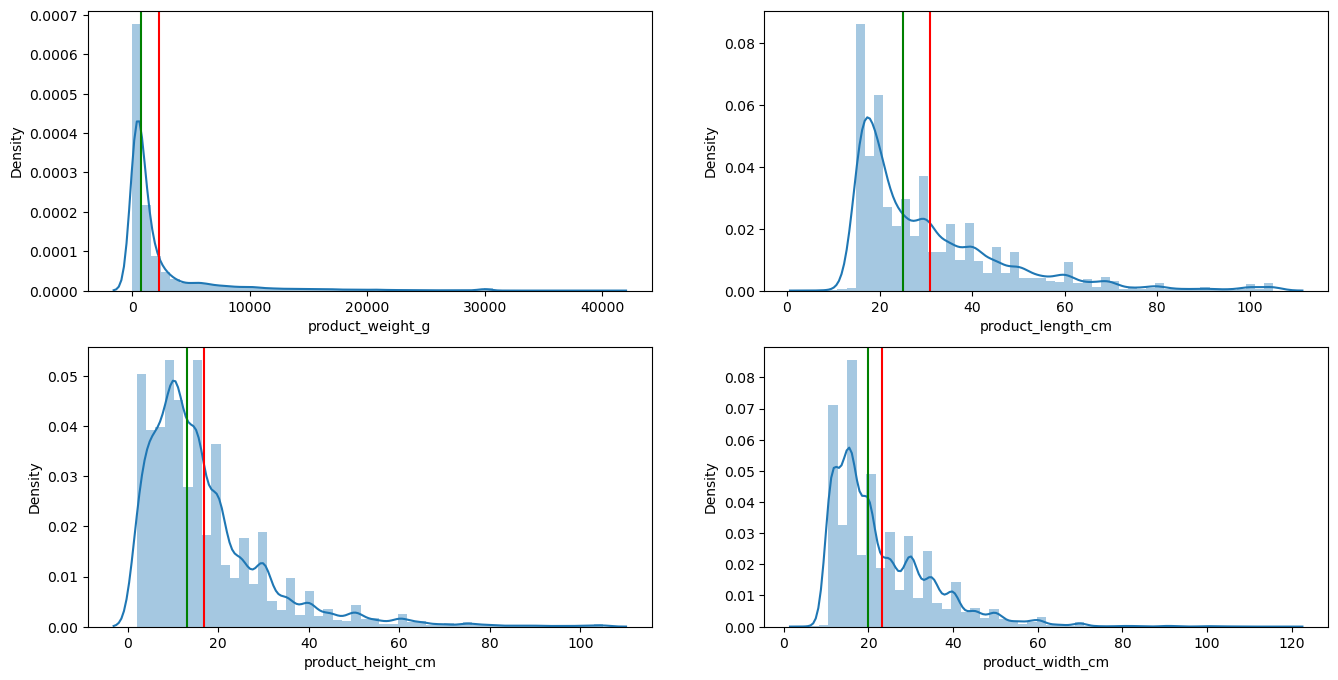

In [48]:
#Checking the distribution

plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="red")
plt.axvline(products.product_weight_g.median(), color ="green")


plt.subplot(2,2,2)
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(),color="red")
plt.axvline(products.product_length_cm.median(), color = "green")

plt.subplot(2,2,3)
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(),color="red")
plt.axvline(products.product_height_cm.median(), color = "green")

plt.subplot(2,2,4)
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(),color="red")
plt.axvline(products.product_width_cm.median(), color = "green")

plt.show()


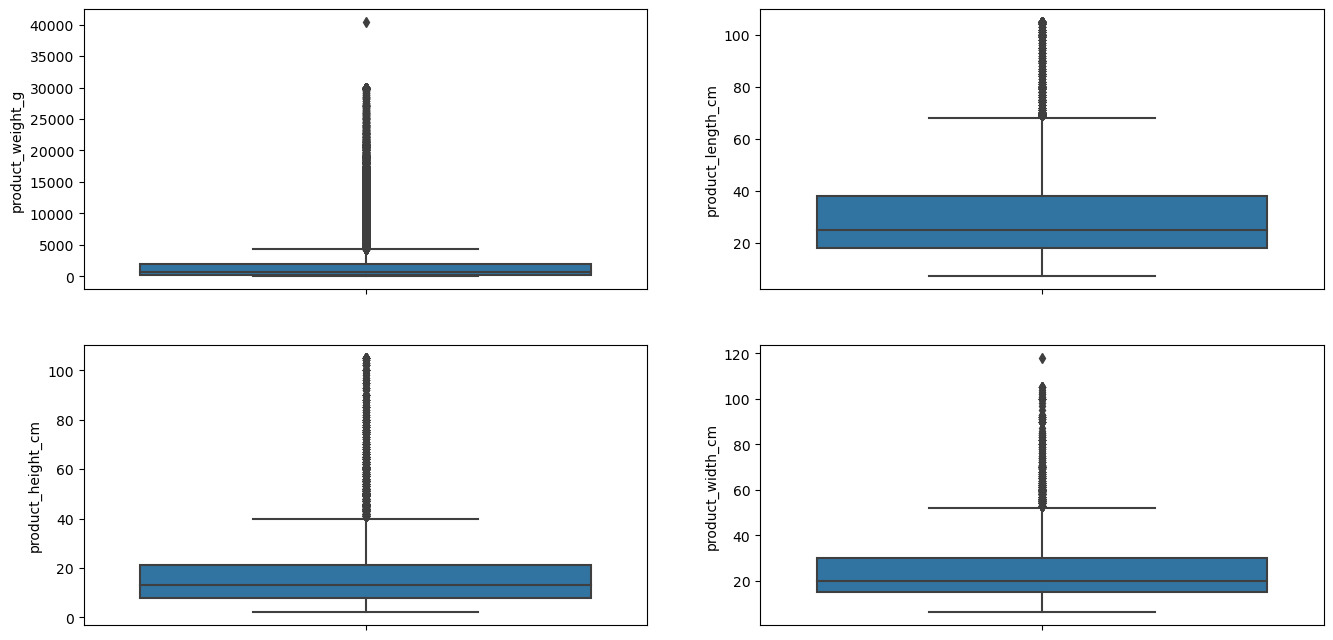

In [49]:
#Checking for outliers

plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.boxplot(y = products.product_weight_g)

plt.subplot(2,2,2)
sns.boxplot(y = products.product_length_cm)

plt.subplot(2,2,3)
sns.boxplot(y = products.product_height_cm)

plt.subplot(2,2,4)
sns.boxplot(y = products.product_width_cm)

plt.show()

##### We see that the data  is right-skewed  and there is no significant outlier , we will use median instead of mean to replace the missing values.

In [50]:
#Considering only the numerical columns

num_cols = products.describe().columns.to_list()
num_cols

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [51]:
for i in num_cols:
    products[i].fillna(products[i].median(), inplace = True)

In [52]:
#Checking for missing values again
products.isna().sum().sort_values(ascending = False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

##### There are no duplicates or missing values in any of the dataset , therefore we will now export each sheet into a new dataset.

### Exporting the data
<hr/>

In [53]:
#Creating a Pandas Excel writer using xlsxwriter as the engine

writer= pd.ExcelWriter("Retail_dataset_cleaned.xlsx", engine = 'xlsxwriter')

In [54]:
#Writing each dataframe to a different worksheet

orders.to_excel(writer, sheet_name ="orders", index = False)
customers.to_excel (writer, sheet_name ="customers", index= False)
order_items.to_excel(writer, sheet_name= "order_items", index = False)
payments.to_excel(writer, sheet_name='payments', index = False)
products.to_excel(writer, sheet_name = "products", index = False)

In [55]:
#Closing the Pandas Excel Writer and output the Excel file

writer.save()
print("File exported successfully")

File exported successfully


In [56]:
#Checking if the export was successful

import os
os.getcwd()

'C:\\Users\\Jocelyne'

# Market Basket Analysis
<hr/>

We will perform market basket analysis on "product_category_name".

### Data Preparation:

- using "Retail_dataset_cleaned.xlsx"

In [62]:
#Reading the order_items data
df1 = pd.read_excel("Retail_dataset_cleaned.xlsx", sheet_name="order_items")

In [63]:
#Checking the head
df1.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [64]:
#Checking the shape
df1.shape

(112650, 6)

In [65]:
# Reading products data
df2 = pd.read_excel("Retail_dataset_cleaned.xlsx", sheet_name="products")

In [66]:
#Checking the head
df2.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,baby,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,housewares,625,20,17,13


In [67]:
#Checking the shape
df2.shape

(32951, 6)

In [69]:
# Merging both data frames using the common column product_id
df = pd.merge(df1, df2, on = 'product_id', how = 'inner', indicator = True)
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650,28,9,14,both
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650,28,9,14,both
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650,28,9,14,both
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both


In [70]:
# Checking the shape of merged data frame
df.shape

(112650, 12)

- For our analysis we will only need the product category name and the order_id.

In [72]:
# Filtering the data frame to have only the required columns

df = df[['order_id','product_category_name']]
df.head()

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,toys
1,130898c0987d1801452a8ed92a670612,toys
2,532ed5e14e24ae1f0d735b91524b98b9,toys
3,6f8c31653edb8c83e1a739408b5ff750,toys
4,7d19f4ef4d04461989632411b7e588b9,toys


In [73]:
#Checking the shape
df.shape

(112650, 2)

In [79]:
#Creating a Pandas Excel writer using XlsxWriter as the engine

writer = pd.ExcelWriter('Market_basket_analysis.xlsx', engine='xlsxwriter')

In [80]:
# Writing the dataframe to two different worksheets as we need to create self-join in Tableau for Market Basket Analysis. 

df.to_excel(writer, sheet_name='Order_ProductCat_1', index = False)
df.to_excel(writer, sheet_name='Order_ProductCat_2', index = False)

In [81]:
# Closing the Pandas Excel writer and output the Excel file

writer.save()
print("Files exported successfully.")

Files exported successfully.


In [82]:
# Checking if the export was successful

import os
os.getcwd()

'C:\\Users\\Jocelyne'

##### Next, we will use this data  file to perform Market Basket analysis and check the product category association in Tableau.